# Matrices
Una matriz es un arreglo rectangular de escalares (es decir, cualquier número: entero, real o complejo) dispuestos en filas y columnas, por ejemplo:

$$\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}$$

También puede pensar en una matriz como una lista de vectores: la matriz anterior contiene 2 vectores 3D horizontales o 3 vectores 2D verticales.

Las matrices son convenientes y muy eficientes para ejecutar operaciones en muchos vectores a la vez. También veremos que son excelentes para representar y realizar transformaciones lineales como rotaciones, traslaciones y cambios de escala.

## Matrices en python
En python, una matriz se puede representar de varias formas. El más simple es solo una lista de listas de python:

In [2]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

Pero, al igual que con los vectores, es mucho más eficiente representarlas como arreglos NumPy.


In [3]:
import numpy as np
A = np.array([
    [10,20,30],
    [40,50,60]
])
print(A)

[[10 20 30]
 [40 50 60]]


Por convención, las matrices generalmente tienen nombres en mayúsculas, como $A$.

En el resto de este Notebook, asumiremos que estamos usando arreglos NumPy (tipo `ndarray`) para representar matrices.

## Tamaño
El tamaño de una matriz se define por su número de filas y número de columnas. Se define  $filas \times columnas$. Por ejemplo, la matriz $A$ anterior es un ejemplo de una matriz de $2 \times 3$: 2 filas, 3 columnas. 

*Nota: una matriz de $3 \times 2$ tendría 3 filas y 2 columnas.*

Para obtener el tamaño de una matriz en NumPy:

In [4]:
A.shape

(2, 3)

**Nota**: el atributo `size` representa el número de elementos en el `ndarray`, no el tamaño de la matriz:

In [5]:
A.size

6

## Indexación de elementos
El número ubicado en la fila $i^{th}$ y la columna $j^{th}$ de una matriz $X$ a veces se indica como $X_{i,j}$ o $X_{ij}$, pero no no es una notación estándar, por lo que la gente suele preferir nombrar explícitamente los elementos, así: "*Sea $X = (x_{i,j})_{1 ≤ i ≤ m, 1 ≤ j ≤ n}$*". Esto significa que $X$ es igual a:

$X = \begin{bmatrix}
   x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
   x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
   x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
   \vdots & \vdots & \vdots & \ddots & \vdots \\
   x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

Sin embargo, en este notebook usaremos la notación $X_{i,j}$, ya que coincide bastante bien con la notación de NumPy. Tenga en cuenta que en matemáticas, los índices generalmente comienzan en 1, pero en programación generalmente comienzan en 0. Entonces, para acceder a $A_{2,3}$ mediante programación, debemos escribir esto:

In [6]:
A[1,2]  # 2da fila, 3ra columna

np.int64(60)

El vector de  la fila $i^{ésima}$ a veces se anota como $M_i$ o $M_{i,*}$, pero nuevamente no hay una notación estándar, por lo que las personas prefieren definir explícitamente sus propios nombres, por ejemplo: "*Sea **x**$_{i}$ el $i^{ésimo}$ vector fila  de la matriz $X$*". Usaremos $M_{i,*}$, por la misma razón que la anterior. Por ejemplo, para acceder a $A_{2,*}$ (es decir, el vector de la segunda fila de $A$):

In [7]:
A[1, :]  # Vector de segunda fila (como una matriz 1D)

array([40, 50, 60])

De manera similar, el $j^{ésimo}$ vector de columna a veces se indica como $M^j$ o $M_{*,j}$, pero no existe una notación estándar. Usaremos $M_{*,j}$. Por ejemplo, para acceder a $A_{*,3}$ (es decir, el vector de la tercera columna de $A$):

In [8]:
A[:, 2]  # 3er vector de columna (como una matriz 1D)

array([30, 60])

Tenga en cuenta que el resultado es en realidad una matriz NumPy unidimensional: no existe una matriz unidimensional *vertical* u *horizontal*. Si realmente necesita representar un vector de fila como una matriz de una fila (es decir, una matriz 2D NumPy), o un vector de columna como una matriz de una columna, entonces necesita usar un slice en lugar de un índice al acceder a la fila o columna, por ejemplo:

In [9]:
A[1:2, :]  # filas 2 a 3 (excluidas): esto devuelve la fila 2 como una matriz de una fila

array([[40, 50, 60]])

In [10]:
A[:, 2:3]  # columnas 3 a 4 (excluidas): esto devuelve la columna 3 como una matriz de una columna

array([[30],
       [60]])

## Matrices cuadradas, triangulares, diagonales e identidad
Una **matriz cuadrada** es una matriz que tiene el mismo número de filas y columnas, por ejemplo, una matriz de $3 \times 3$:

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

Una **matriz triangular superior** es un tipo especial de matriz cuadrada donde todos los elementos *debajo* de la diagonal principal (de arriba a la izquierda a abajo a la derecha) son cero, por ejemplo:

\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}

De manera similar, una **matriz triangular inferior** es una matriz cuadrada donde todos los elementos *encima* de la diagonal principal son cero, por ejemplo:

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

Una **matriz triangular** es una que es triangular inferior o triangular superior.

Una matriz que es tanto triangular superior como inferior se denomina **matriz diagonal**, por ejemplo:

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}

Puede construir una matriz diagonal usando la función `diag` de NumPy:

In [11]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

Si pasa una matriz a la función `diag`,  extraerá los valores diagonales:

In [12]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

Finalmente, la **matriz identidad** de tamaño $n$, indicada como $I_n$, es una matriz diagonal de tamaño $n \times n$ con $1$ en la diagonal principal, por ejemplo $I_3$:

\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}

La función `eye` de Numpy devuelve la matriz de identidad del tamaño deseado:

In [13]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

La matriz de identidad a menudo se indica simplemente como $I$ (en lugar de $I_n$) cuando su tamaño es claro dado el contexto. Se llama la matriz *identidad* porque al multiplicar una matriz con ella, la matriz permanece sin cambios, como veremos a continuación.

## Sumando matrices
Si dos matrices $Q$ y $R$ tienen el mismo tamaño $m \times n$, se pueden sumar. La suma se realiza *elemento a elemento*: el resultado también es una matriz $m \times n$ $S$ donde cada elemento es la suma de los elementos en la posición correspondiente: $S_{i,j} = Q_{i,j} + R_{i,j}$

$$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$$

Por ejemplo, creemos una matriz de $2 \times 3$ $B$ y calculemos $A + B$:

In [14]:
B = np.array([[1,2,3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [16]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

**La suma es *conmutativa***, lo que significa que $A + B = B + A$:

In [17]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

**También es *asociativo***, lo que significa que $A + (B + C) = (A + B) + C$:

In [18]:
C = np.array([[100,200,300], [400, 500, 600]])

A + (B + C)

array([[111, 222, 333],
       [444, 555, 666]])

In [19]:
(A + B) + C

array([[111, 222, 333],
       [444, 555, 666]])

## Multiplicación por un escalar
Una matriz $M$ se puede multiplicar por un escalar $\lambda$. El resultado se anota $\lambda M$, y es una matriz del mismo tamaño que $M$ con todos los elementos multiplicados por $\lambda$:

$$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$$

Una forma más concisa de escribir esto es:

$(\lambda M)_{i,j} = \lambda (M)_{i,j}$

En NumPy, simplemente use el operador `*` para multiplicar una matriz por un escalar. Por ejemplo:

In [20]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

La multiplicación escalar también se define en el lado derecho y da el mismo resultado: $M \lambda = \lambda M$. Por ejemplo:

In [21]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Esto hace que la multiplicación escalar sea **conmutativa**.

También es **asociativa**, lo que significa que $\alpha (\beta M) = (\alpha \times \beta) M$, donde $\alpha$ y $\beta$ son escalares. Por ejemplo:

In [22]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [23]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

Finalmente, es **distributiva sobre la suma** de matrices, lo que significa que $\lambda (Q + R) = \lambda Q + \lambda R$:

In [24]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [25]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

## Multiplicación de matrices
Hasta ahora, las operaciones matriciales han sido bastante intuitivas. Pero multiplicar matrices es un poco más complicado.

Una matriz $Q$ de tamaño $m \times n$ se puede multiplicar por una matriz $R$ de tamaño $n \times q$. Se anota simplemente $QR$ sin signo de multiplicación ni punto. El resultado $P$ es una matriz $m \times q$ donde cada elemento se calcula como una suma de productos:

$$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$$

El elemento en la posición $i,j$ en la matriz resultante es la suma de los productos de los elementos en la fila $i$ de la matriz $Q$ por los elementos en la columna $j$ de la matriz $R$.

![Alt Text](https://numbas.mathcentre.ac.uk/media/question-resources/Matrix_Multiplication_02.gif)


Puedes notar que cada elemento $P_{i,j}$ es el producto escalar del vector fila $Q_{i,*}$ y el vector columna $R_{*,j}$:

$$P_{i,j} = Q_{i,*} \cdot R_{*,j}$$

Entonces podemos reescribir $P$ de manera más concisa como:

$$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$$


Multipliquemos dos matrices en NumPy, usando el método `dot` de `ndarray`:
$$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$$

In [26]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Verifiquemos este resultado mirando un elemento, solo para estar seguros: mirando $E_{2,3}$ por ejemplo, necesitamos multiplicar los elementos en la $2^{da}$ fila de $A$ por los elementos en la $3^{ra}$ columna de D y suma estos productos:

In [27]:
40*5 + 50*17 + 60*31

2910

In [28]:
E[1,2]  # fila 2, columna 3

np.int64(2910)

¡Se ve bien! Puedes comprobar los otros elementos hasta que te acostumbres al algoritmo.

Multiplicamos una matriz de $2 \times 3$ por una matriz de $3 \times 4$, por lo que el resultado es una matriz de $2 \times 4$. El número de columnas de la primera matriz tiene que ser igual al número de filas de la segunda matriz. Si intentamos multiplicar $D$ por $A$, obtenemos un error porque D tiene 4 columnas mientras que A tiene 2 filas:

In [29]:
try:
    D.dot(A)
except ValueError as e:
    print("ValueError:", e)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


Esto ilustra el hecho de que **la multiplicación de matrices *NO* es conmutativa**: en general $QR ≠ RQ$

De hecho, $QR$ y $RQ$ solo están *ambos* definidos si $Q$ tiene el tamaño $m \times n$ y $R$ tiene el tamaño $n \times m$. Veamos un ejemplo en el que ambos *están* definidos y mostramos que (en general) *NO* son iguales:

In [30]:
F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])
A.dot(F)

array([[400, 130],
       [940, 310]])

In [31]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

Por otro lado, **la multiplicación de matrices *es* asociativa**, lo que significa que $Q(RS) = (QR)S$. Vamos a crear una matriz de $4 \times 5$ $G$ para ilustrar esto:

In [32]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
A.dot(D).dot(G)     # (AB)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [33]:
A.dot(D.dot(G))     # A(BG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

También es ***distributivo* sobre la suma** de matrices, lo que significa que $(Q + R)S = QS + RS$. Por ejemplo:

In [34]:
(A + B).dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [35]:
A.dot(D) + B.dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

El producto de una matriz $M$ por la matriz identidad (de igual tamaño) da como resultado la misma matriz $M$. Más formalmente, si $M$ es una matriz $m \times n$, entonces:

$M I_n = I_m M = M$

Esto generalmente se escribe de manera más concisa (ya que el tamaño de las matrices de identidad no es ambiguo dado el contexto):

$MI = IM = M$

Por ejemplo:

In [36]:
A.dot(np.eye(3))

array([[10., 20., 30.],
       [40., 50., 60.]])

In [37]:
np.eye(2).dot(A)

array([[10., 20., 30.],
       [40., 50., 60.]])

**Precaución**: el operador `*` de NumPy realiza multiplicaciones por elementos, *NO* una multiplicación de matrices:

In [38]:
A * B   # NO es una multiplicación de matrices

array([[ 10,  40,  90],
       [160, 250, 360]])

**El operador infijo @**

Python 3.5 [introdujo](https://docs.python.org/3/whatsnew/3.5.html#pep-465-a-dedicated-infix-operator-for-matrix-multiplication) el operador infijo `@` para la multiplicación de matrices, y NumPy 1.10 agregó soporte para ello. Si está utilizando Python 3.5+ y NumPy 1.10+, simplemente puede escribir `A @ D` en lugar de `A.dot(D)`, lo que hace que su código sea mucho más legible (pero menos portátil). Este operador también funciona para productos de puntos vectoriales.

In [39]:
import sys
print("Python version: {}.{}.{}".format(*sys.version_info))
print("Numpy version:", np.version.version)

A @ D

Python version: 3.11.9
Numpy version: 2.1.3


array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Nota: `Q @ R` es en realidad equivalente a `Q.__matmul__(R)`, que NumPy implementa como `np.matmul(Q, R)`, no como `Q.dot(R)`. La principal diferencia es que `matmul` no soporta la multiplicación escalar, mientras que `dot` sí, así que puedes escribir `Q.dot(3)`, que es equivalente a `Q * 3`, pero no puedes escribir `Q @ 3`.

## Matriz transpuesta
La transpuesta de una matriz $M$ es una matriz denominada $M^T$ tal que la fila $i^{th}$ en $M^T$ es igual a la columna $i^{th}$ en $M$ :

$$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$$

En otras palabras, ($A^T)_{i,j}$ = $A_{j,i}$

Obviamente, si $M$ es una matriz $m \times n$, entonces $M^T$ es una matriz $n \times m$.

Nota: hay algunas otras notaciones, como $M^t$, $M′$ o ${^t}M$.

En NumPy, la transposición de una matriz se puede obtener simplemente usando el atributo `T`:

In [40]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [41]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

Como era de esperar, transponer una matriz dos veces devuelve la matriz original:

In [42]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

La transposición es distributiva sobre la suma de matrices, lo que significa que $(Q + R)^T = Q^T + R^T$. Por ejemplo:

In [43]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [44]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

Además, $(Q \cdot R)^T = R^T \cdot Q^T$. Tenga en cuenta que el orden es inverso. Por ejemplo:

In [45]:
(A.dot(D)).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [46]:
D.T.dot(A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

Una **matriz simétrica** $M$ se define como una matriz que es igual a su traspuesta: $M^T = M$. Esta definición implica que debe ser una matriz cuadrada cuyos elementos sean simétricos con respecto a la diagonal principal, por ejemplo:

\begin{bmatrix}
  17 & 22 & 27 & 49 \\
  22 & 29 & 36 & 0 \\
  27 & 36 & 45 & 2 \\
  49 & 0 & 2 & 99
\end{bmatrix}

El producto de una matriz por su transpuesta siempre es una matriz simétrica, por ejemplo:

In [47]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

## Conversión de matrices 1D en matrices 2D en NumPy
Como mencionamos anteriormente, en NumPy (a diferencia de Matlab, por ejemplo), 1D realmente significa 1D: no existe tal cosa como una matriz 1D vertical o una matriz 1D horizontal. Por lo tanto, no debería sorprenderse al ver que la transposición de una matriz 1D no hace nada:

In [48]:
u = np.array([2, 5])

In [49]:
u.T

array([2, 5])

Queremos convertir $\textbf{u}$ en un vector fila antes de transponerlo. Hay algunas maneras de hacer esto:

In [50]:
u_row = np.array([u])
u_row

array([[2, 5]])

Observe los corchetes adicionales: esta es una matriz 2D con solo una fila (es decir, una matriz de 1x2). En otras palabras, realmente es un **vector de fila**.

In [51]:
u[np.newaxis, :]

array([[2, 5]])

Observe los corchetes adicionales: esta es una matriz 2D con solo una fila (es decir, una matriz de 1x2). En otras palabras, realmente es un **vector de fila**.

In [52]:
u[np.newaxis]

array([[2, 5]])

Esto es equivalente, pero un poco menos explícito.

Ok, ahora transpongamos nuestro vector fila:

In [53]:
u_row.T

array([[2],
       [5]])

¡Genial! Ahora tenemos un buen **vector de columna**.

En lugar de crear un vector de fila y luego transponerlo, también es posible convertir una matriz 1D directamente en un vector de columna:

In [54]:
u[:, np.newaxis]

array([[2],
       [5]])

## Graficar una matriz
Ya hemos visto que los vectores se pueden representar como puntos o flechas en un espacio N-dimensional. ¿Existe una buena representación gráfica de las matrices? Bueno, simplemente puede ver una matriz como una lista de vectores, por lo que trazar una matriz da como resultado muchos puntos o flechas. Por ejemplo, creemos una matriz `P` de $2 \times 4$ y representémosla como puntos:

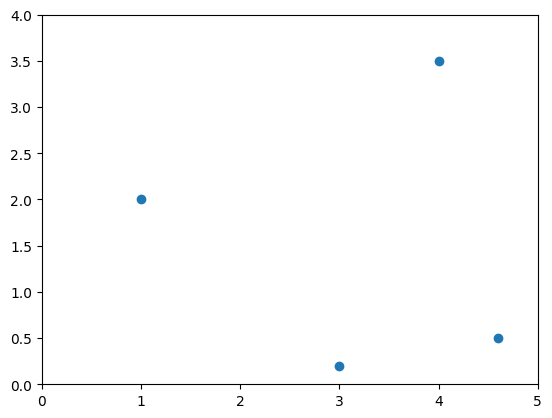

In [55]:
import matplotlib.pyplot as plt

P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

Por supuesto, también podríamos haber almacenado los mismos 4 vectores como vectores de fila en lugar de vectores de columna, dando como resultado una matriz de $4 \times 2$ (la transpuesta de $P$, de hecho). Es realmente una elección arbitraria.

Como los vectores están ordenados, puedes ver la matriz como un camino y representarla con puntos conectados:

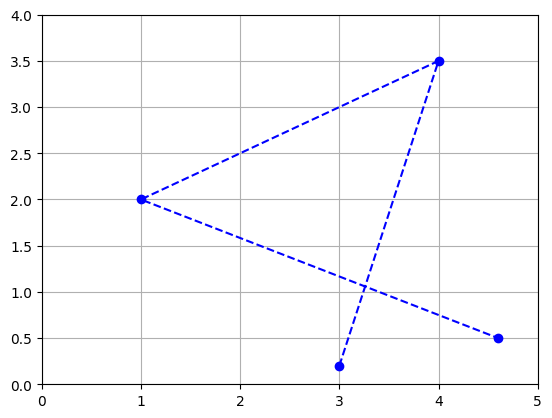

In [56]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

O puede representarlo como un polígono: la clase `Polygon` de matplotlib espera una matriz $n \times 2$ NumPy, no una matriz $2 \times n$, por lo que solo necesitamos darle $P^T$:

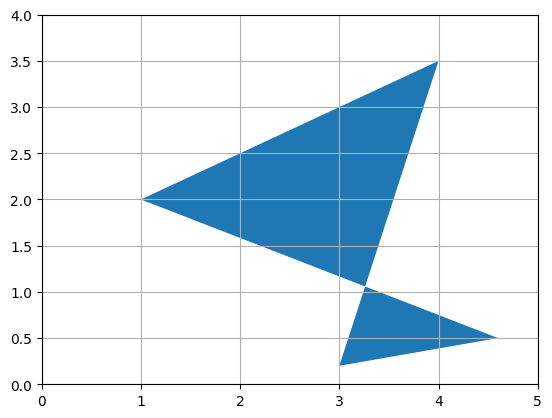

In [57]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

## Determinante
El determinante de una matriz cuadrada $M$, anotado $\det(M)$ o $\det M$ o $|M|$ es un valor que se puede calcular a partir de sus elementos $(M_{i,j})$ usando varios métodos equivalentes. Uno de los métodos más simples es este enfoque recursivo:

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$

* Donde $M^{(i,j)}$ es la matriz $M$ sin fila $i$ ni columna $j$.
Por ejemplo, calculemos el determinante de la siguiente matriz $3 \times 3$:
$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

Usando el método anterior, obtenemos: 

$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$ 

Ahora necesitamos calcular el determinante de cada una de estas matrices de $2 \times 2$ (estos determinantes se llaman **menores**):

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

Ahora podemos calcular el resultado final:

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$